In [ ]:
%%capture
!pip install boto3
!pip install --upgrade awscli
!pip install rasterio
!pip install geopandas

In [ ]:
import json
import os
import PIL
import rasterio as rio
import geopandas as gpd


In [ ]:
  # Enter aws user credentials
with open('/content/drive/MyDrive/config/credentials.json', 'r') as myfile:
    data=myfile.read()

# parse file
obj = json.loads(data)
#get username and key
access_key = str(obj['aws_access_key_id'])
secret_key = str(obj['aws_secret_access_key'])
default_region = str(obj['aws_default_region'])
# 
os.environ['AWS_ACCESS_KEY_ID'] = access_key
os.environ['AWS_SECRET_ACCESS_KEY'] = secret_key
os.environ['AWS_DEFAULT_REGION'] = default_region

In [ ]:
# List the data directory on AWS
!aws s3 ls 's3://spacenet-dataset/spacenet/SN4_buildings/' --human-readable --summarize

                           PRE sample/
                           PRE tarballs/
                           PRE test_public/
                           PRE train/

Total Objects: 0
   Total Size: 0 Bytes


In [ ]:
# Download the samples
!aws s3 cp 's3://spacenet-dataset/spacenet/SN4_buildings/sample/' SpaceNetTrain/ --recursive 

In [ ]:
# Let's explore the data

ms_img = rio.open('/content/SpaceNetTrain/Atlanta_nadir10_catid_1030010003993E00/MS/MS_Atlanta_nadir10_catid_1030010003993E00_741251_3742239.tif')


In [ ]:
ms_img.bounds

BoundingBox(left=741251.0, bottom=3742239.0, right=741701.0, top=3742689.0)

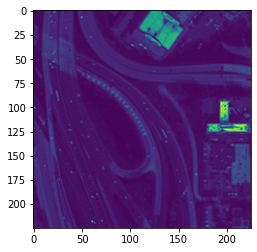

In [ ]:
from matplotlib import pyplot
pyplot.imshow(ms_img.read(1))
#print(img.read(8).max())

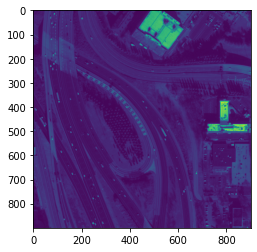

In [ ]:
import numpy as np
# Read the PAN version
pan_img = rio.open('/content/SpaceNetTrain/Atlanta_nadir10_catid_1030010003993E00/PAN/PAN_Atlanta_nadir10_catid_1030010003993E00_741251_3742239.tif')
pyplot.imshow(pan_img.read(1))


In [ ]:
target = gpd.read_file('/content/SpaceNetTrain/geojson/spacenet-buildings/spacenet-buildings_741251_3742239.geojson')

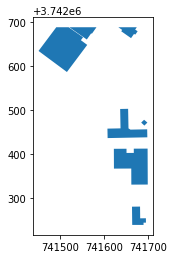

In [ ]:
target.plot()

#Reference:
- https://spacenet.ai/off-nadir-building-detection/
- https://spacenetchallenge.github.io/Labeling_Schema/SpaceNetBuildings_labeling_rules_v1.html